# CIR

In [1]:
%load_ext autoreload
%autoreload 2

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng, SeedSequence

In [85]:
sq = SeedSequence()
rng = default_rng(sq)

In [86]:
from scheme import *
from errors import *

# Strong errors

In [87]:
params = {
    'x0': 1,
    'a': 1,
    'k': 1,
    # "sigma": np.sqrt(3) bug implicit3
    'sigma': 1,
    'T':1,
    'lambdaa': 1/8
    
}
schemaTypes = ["implicit_3", "implicit_4", "E_lambda", "E_0", "E_lambda", "Diop", "D-D"]

In [88]:
scheme = CIR(**params)

In [94]:
step_width = np.linspace(0.0001,0.01,20)
steps = np.round(1/step_width).astype(int)

In [95]:
steps = [100*i for i in range(1,20)]
result_strong_error = pd.DataFrame(index= steps)
result_strong_error['step_width'] = 1/result_strong_error.index
for type in schemaTypes:
    result_strong_error[type] = strong_error(scheme, scheme_type= type, steps= steps)[:,0]

<Axes: xlabel='step_width'>

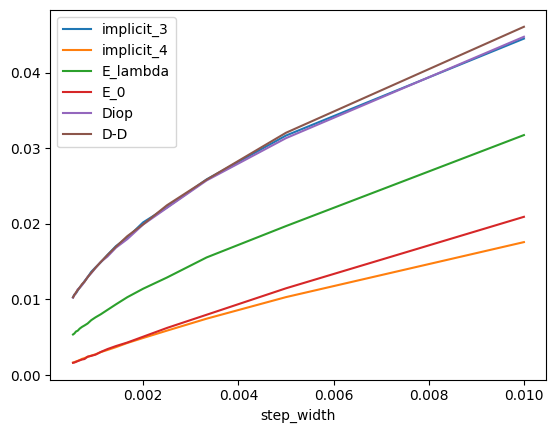

In [96]:
result_strong_error.set_index(['step_width']).plot()

# weak errors

In [97]:
params = {
    'x0': 0,
    'a': 1,
    'k': 1,
    # "sigma": np.sqrt(3) bug implicit3
    'sigma': 1,
    'T':1,
    'lambdaa': 1/8,
}

In [98]:
scheme = CIR(**params)

In [99]:
step_width = np.linspace(0.001,0.1,20)
steps = np.round(1/step_width).astype(int)

In [100]:
result_weak_error = pd.DataFrame(index= steps)
result_weak_error['step_width'] = 1/result_weak_error.index
for type in schemaTypes:
    result_weak_error[type] = weak_error(lambda x: (5 + 3*x**4)/(2 + 5*x),scheme, scheme_type= type, steps= steps,M = 100000)[:,1]

<Axes: xlabel='step_width'>

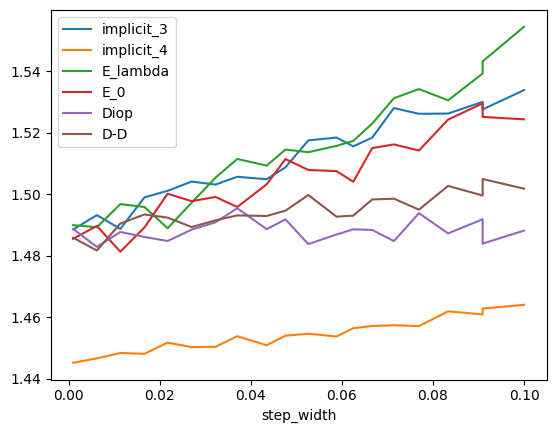

In [101]:
result_weak_error.set_index(['step_width']).plot()